In [1]:
import math
import os

from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [16]:
labels = '/media/mike/Files/Data and Results/innovation-challenge-2019/training-labels.csv'
folder = '/media/mike/Files/Data and Results/innovation-challenge-2019/Train/output_combined2/'
save_folder = '/media/mike/Files/Data and Results/innovation-challenge-2019/Train/'

In [3]:
label_df = pd.read_csv(labels)

In [4]:
gp = label_df.groupby('Drscore')

In [5]:
training_index = {}
val_index = {}
train_val_split = 0.8  # 80% training
training_examples = 0
val_examples = 0

for key, values in gp.groups.items():
    number_of_files = len(values)
    np.random.seed(42)
    shuffled_index = np.random.permutation(values)
    training_index[key] = shuffled_index[:int(number_of_files * train_val_split)]
    val_index[key] = shuffled_index[int(number_of_files * train_val_split):]
    print("\n" + str(key))
    print("Training:", len(training_index[key]))
    print("Validation:", len(val_index[key]))
    training_examples += len(training_index[key])
    val_examples += len(val_index[key])
    
print("\nTraining:", training_examples)
print("Validation:", val_examples)


0
Training: 7876
Validation: 1970

1
Training: 821
Validation: 206

2
Training: 1840
Validation: 460

3
Training: 518
Validation: 130

4
Training: 259
Validation: 65

Training: 11314
Validation: 2831


In [6]:
# https://www.kaggle.com/xhlulu/aptos-2019-densenet-keras-starter

# def get_pad_width(im, new_shape, is_rgb = True):
#     pad_diff = new_shape - im.shape[0], new_shape - im.shape[1]
#     t, b = math.floor(pad_diff[0]/2), math.ceil(pad_diff[0]/2)
#     l, r = math.floor(pad_diff[1]/2), math.ceil(pad_diff[1]/2)
#     if is_rgb:
#         pad_width = ((t,b), (l,r), (0, 0))
#     else:
#         pad_width = ((t,b), (l,r))
#     return pad_width

def preprocess_image(image_path, desired_size = 224):
    im = Image.open(image_path)
    im = im.resize((desired_size, )*2, resample = Image.LANCZOS)
    return im

In [7]:
N = training_examples
x_train = np.empty((N, 224, 224, 3), dtype = np.uint8)
y_train = np.empty((N,), dtype = int)

i = 0
for key, values in training_index.items():
    for idx in values:
        file = label_df.loc[idx, 'Filename']
        x_train[i, :, :, :] = preprocess_image(os.path.join(folder, file))
        y_train[i] = key
        i += 1
        if i % 100 == 0:
            print(i)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300


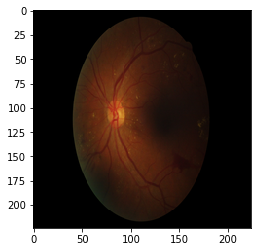

In [34]:
plt.imshow(x_train[-1])

In [18]:
np.save(os.path.join(save_folder, 'training_x.npy'), x_train)

In [31]:
y_one_hot = pd.get_dummies(y_train).values
y_train_multi = np.empty(y_one_hot.shape, dtype = int)
y_train_multi[:, 4] = y_one_hot[:, 4]

for i in range(3, -1, -1):
    y_train_multi[:, i] = np.logical_or(y_one_hot[:, i], y_train_multi[:, i+1])

print("Original y_train:", y_one_hot.sum(axis=0))
print("Multilabel version:", y_train_multi.sum(axis=0))

Original y_train: [7876  821 1840  518  259]
Multilabel version: [11314  3438  2617   777   259]


In [32]:
np.save(os.path.join(save_folder, 'training_y.npy'), y_one_hot)
np.save(os.path.join(save_folder, 'training_y_multi.npy'), y_train_multi)

In [33]:
###
N = val_examples
x_val = np.empty((N, 224, 224, 3), dtype = np.uint8)
y_val = np.empty((N,), dtype = int)

i = 0
for key, values in val_index.items():
    for idx in values:
        file = label_df.loc[idx, 'Filename']
        x_val[i, :, :, :] = preprocess_image(os.path.join(folder, file))
        y_val[i] = key
        i += 1
        if i % 100 == 0:
            print(i)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800


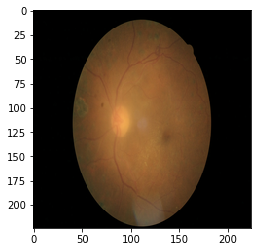

In [35]:
plt.imshow(x_val[-1])

In [36]:
np.save(os.path.join(save_folder, 'val_x.npy'), x_val)

In [37]:
y_val_one_hot = pd.get_dummies(y_val).values
y_val_multi = np.empty(y_val_one_hot.shape, dtype = int)
y_val_multi[:, 4] = y_val_one_hot[:, 4]

for i in range(3, -1, -1):
    y_val_multi[:, i] = np.logical_or(y_val_one_hot[:, i], y_val_multi[:, i+1])

print("Original y_train:", y_val_one_hot.sum(axis=0))
print("Multilabel version:", y_val_multi.sum(axis=0))

Original y_train: [1970  206  460  130   65]
Multilabel version: [2831  861  655  195   65]


In [38]:
np.save(os.path.join(save_folder, 'val_y.npy'), y_val_one_hot)
np.save(os.path.join(save_folder, 'val_y_multi.npy'), y_val_multi)

In [66]:
###
test_folder = '/media/mike/Files/Data and Results/innovation-challenge-2019/Test/'
files = []
number = []
for f in sorted(os.listdir(os.path.join(test_folder, 'Test'))):
    if f.endswith('.tif') or f.endswith('.jpeg') or f.endswith('.jpg'):
        files.append(f)
        number.append(int(f.split('.')[0][10:]))
    else:
        print(f)

number_dict = dict(zip(files, number))
files = sorted(files, key = number_dict.get)

In [68]:
###
N = len(files)
print(N)
x_test = np.empty((N, 224, 224, 3), dtype = np.uint8)

i = 0
for file in files:
    x_test[i, :, :, :] = preprocess_image(os.path.join(test_folder, 'Test', file))
    i += 1
    if i % 100 == 0:
        print(i)

999
100
200
300
400
500
600
700
800
900


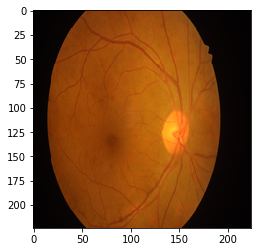

In [69]:
plt.imshow(x_test[-1])

In [70]:
np.save(os.path.join(test_folder, 'test_x.npy'), x_test)

In [71]:
pd.DataFrame(files).to_csv(os.path.join(test_folder, 'test_files.csv'), index = None, header = None)